## Data Analysis Challenge

### Part 1: Exploratory Data Analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

### Open File

In [2]:
data = pd.read_json('/Users/Alfredo/Desktop/github_content/Data-Analysis-Challenges/ultimate_challenge/logins.json')
data.head(10)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
5,1970-01-01 20:21:41
6,1970-01-01 20:12:16
7,1970-01-01 20:35:47
8,1970-01-01 20:35:38
9,1970-01-01 20:47:52


### Check data values

In [3]:
data.dtypes

login_time    datetime64[ns]
dtype: object

In [4]:
data.isnull().any()

login_time    False
dtype: bool

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


### Analysis to a 15 minutes interval

In [6]:
data.sort_values(by='login_time').head(10)

,login_time
6,1970-01-01 20:12:16
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
3,1970-01-01 20:16:36
2,1970-01-01 20:16:37
5,1970-01-01 20:21:41
10,1970-01-01 20:26:05
4,1970-01-01 20:26:21
11,1970-01-01 20:31:03
12,1970-01-01 20:34:46


In [7]:
print(data.max())
print(data.min())

login_time   1970-04-13 18:57:38
dtype: datetime64[ns]
login_time   1970-01-01 20:12:16
dtype: datetime64[ns]


In [8]:
data = data.groupby(pd.Grouper(key='login_time', freq='15min')).size()
data.iloc[:5]

login_time
1970-01-01 20:00:00    2
1970-01-01 20:15:00    6
1970-01-01 20:30:00    9
1970-01-01 20:45:00    7
1970-01-01 21:00:00    1
Freq: 15T, dtype: int64

In [9]:
data = data.to_frame(name='count')
data.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


### Visualizing Data

In [10]:
# Time period range
print(data.index.min())
print(data.index.max())

1970-01-01 20:00:00
1970-04-13 18:45:00


Data is from January 1rst through April 13

In [11]:
# January's Activity
#data['1970-01'].iloc[:5]

In [12]:
# Activities after February 5th, 1970
#data[data.index(1970, 2, 5):]

In [13]:
# Checking date ranges values
#data['3/3/1970':'4/4/1970'].iloc[:5]

In [14]:
# Mean values per day
#data.resample('D').mean().head(5)

In [15]:
# Total values per day
#data.resample('D').sum().head(5)

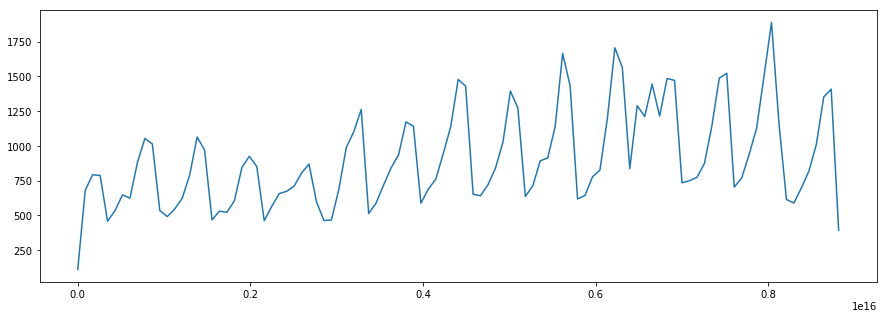

In [16]:
# Overall activity
plt.figure(figsize=(15,5))
plt.plot(data.resample('D').sum())
plt.show()

Over the months, we do see a cycle activity trend

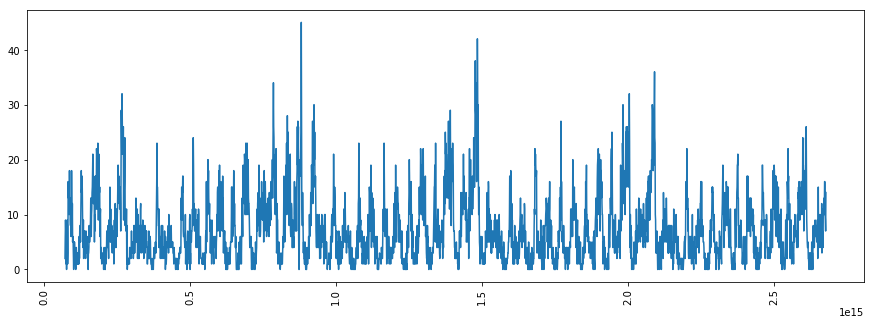

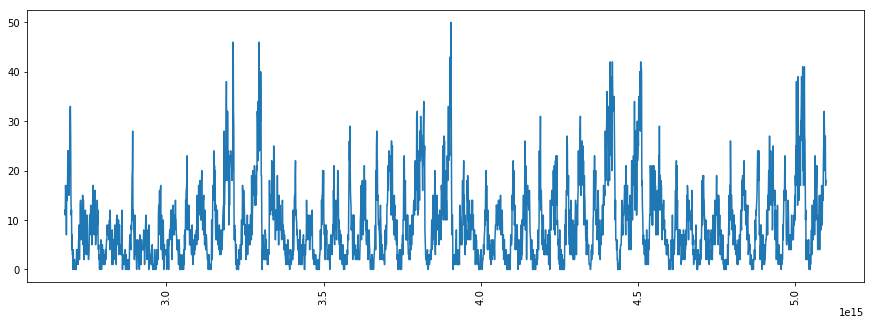

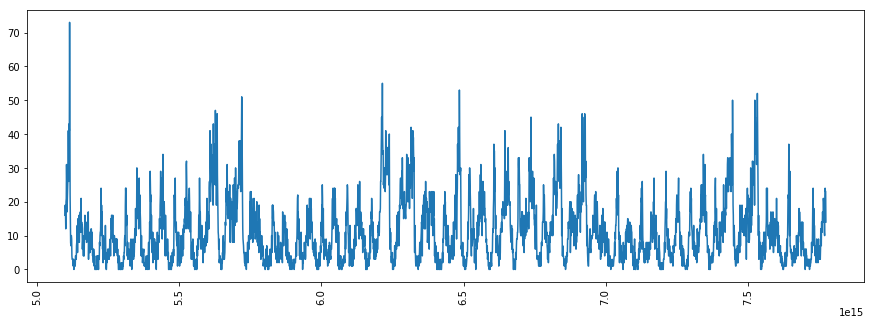

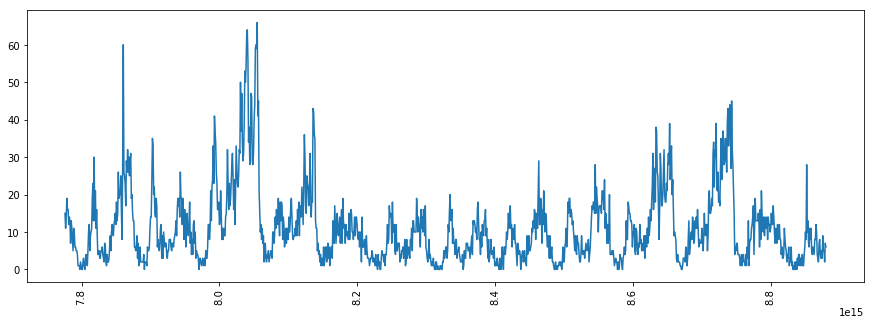

In [17]:
# list of activities per month
lst_months = [data['1970-01'],data['1970-02'],data['1970-03'],data['1970-04']]

# visualizing each month's activities
for i in lst_months:
    plt.figure(figsize=(15,5)) 
    plt.plot(i)
    plt.xticks(rotation='vertical')
    plt.show()

Looking at the logins activities in a monthly basis, there seems to be a weekly cycle of frequency usage activities.

In [18]:
# Re-read in the data
df_logs = pd.read_json('/Users/Alfredo/Desktop/github_content/Data-Analysis-Challenges/ultimate_challenge/logins.json')
# set index to login_times
df_logins = df_logs.set_index('login_time')


# Split by month into new dataframe
jan_df = df_logins['1970-01']
jan_df.reset_index(drop=False, inplace=True)

feb_df = df_logins['1970-02']
feb_df.reset_index(drop=False, inplace=True)

mar_df = df_logins['1970-03']
mar_df.reset_index(drop=False, inplace=True)

apr_df = df_logins['1970-04']
apr_df.reset_index(drop=False, inplace=True)

jan_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [19]:
# build list with months and their corresponding values
month_list = [jan_df, feb_df, mar_df, apr_df]

# add column 'day_of_week' to each month's dataframe
for i in month_list:
    i['day_of_week'] = i.login_time.dt.dayofweek
    
#jan_df.head(5)

In [20]:
# Define a function to color each day of the week when plotting
def show_trends(df, title, weekends=False):
    
    # for each dataframe given, set index to 'login_time
    new_df = df.set_index('login_time')

    # for each dataframe given
    for day in sorted(list(new_df['day_of_week'].unique())):

        temp = new_df[new_df['day_of_week'] == day]
        temp.drop('day_of_week', axis=1, inplace=True)
        temp['count'] = 1
        temp = temp.resample('15T').sum()
        
        if weekends == True:
            if day in [0,1,2,3,4]:
                color = 'green'
            else:
                color = 'red'
            plt.plot(temp, color=color)
            plt.title(title)
            plt.xticks(rotation='vertical')
         
        else:
            plt.plot(temp)
            plt.title(title)
            plt.xticks(rotation='vertical')

In [21]:
jan_df['Day'] = jan_df.login_time.dt.weekday_name
jan_df.iloc[:5]

,login_time,day_of_week,Day
0,1970-01-01 20:13:18,3,Thursday
1,1970-01-01 20:16:10,3,Thursday
2,1970-01-01 20:16:37,3,Thursday
3,1970-01-01 20:16:36,3,Thursday
4,1970-01-01 20:26:21,3,Thursday


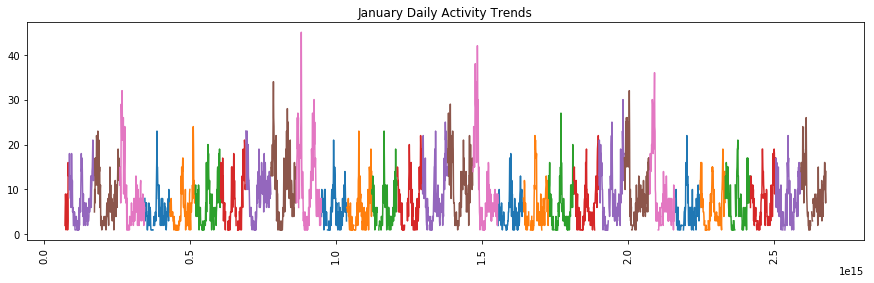

In [22]:
plt.figure(figsize=(15,4))
show_trends(jan_df, title='January Daily Activity Trends')

The graph show everyday of the week's activity, each in a different color. Activity starts on Thursday, the 4th day of the week(*pandas takes 0 as a nummerical values and for this reason Thursday show as the third day of the week), which is label as the red, as we look through the rest of the days, we do see a daily cycle and saturday and sunday shows the highest activity during the week, after the activy slows down and starts the cycle once again.

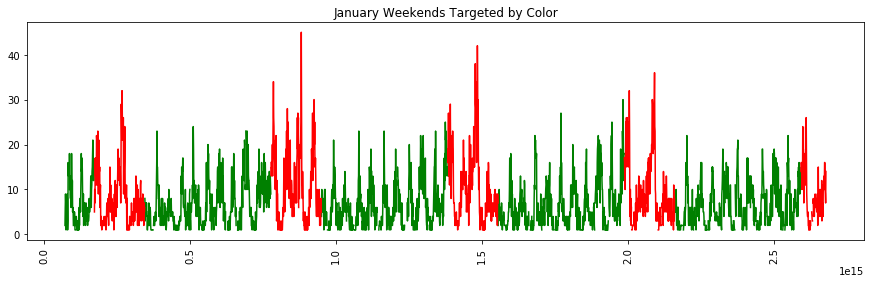

In [23]:
plt.figure(figsize=(15,4))
show_trends(jan_df, title='January Weekends Targeted by Color', weekends=True)

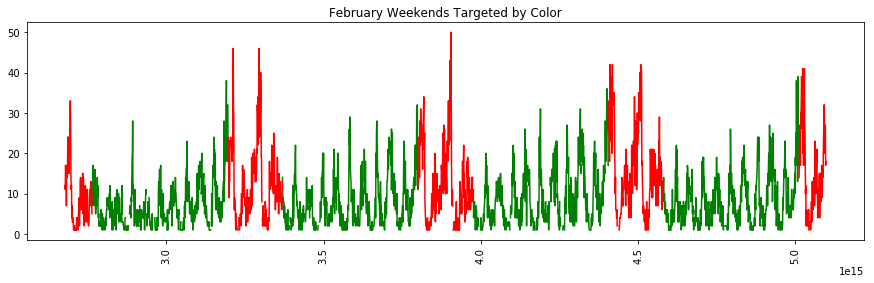

In [24]:
plt.figure(figsize=(15,4))
show_trends(feb_df, title='February Weekends Targeted by Color', weekends=True)

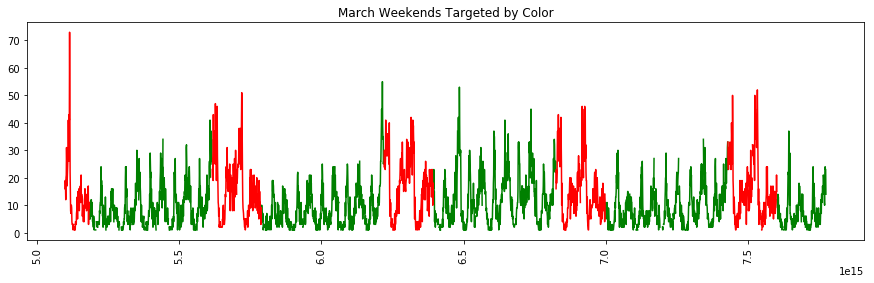

In [25]:
plt.figure(figsize=(15,4))
show_trends(mar_df, title='March Weekends Targeted by Color', weekends=True)

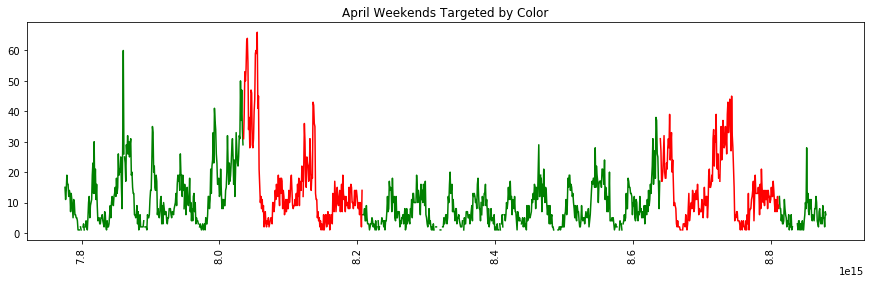

In [26]:
plt.figure(figsize=(15,4))
show_trends(apr_df, title='April Weekends Targeted by Color', weekends=True)

The graphs above narrows down the weekends to the red values and reassures the acvity increase during weekends

### Part 2: Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

   a. how you will implement the experiment.
 
   b. what statistical test(s) you will conduct to verify the           significance of the observation.
 
   c. how you would interpret the results and provide                   recommendations to the city operations team along with any         caveats.

1. 


It tells us that that the two driver partners from each city tend to be exclusive to each other, meaning that almost 100% of drivers in Gotham spend their time only in Gotham, while nearly 100% of the time Metropolis spend their time at Metropolis.

The key measure is Drivers' time spend in each city. After the experiment of toll reimbursements, ideally we would want to see a balance of 50%  mean time spend in one city and the other 50% mean time spent in the other from all drivers in both cities. However, if after the experiment we still see an imbalance time spend in one city to another from all drivers in both cities, further investigation needs to be done as of why this is the case and find solutions to build a more stable and balance time spend in each city from all drivers.

2.

a.


The problem to tackle:
-Gotham driver's average time driving in Gotham is almost 100%, 0% Metropolis.
-Metropolis driver's average time driving in Metropolis is nearly 100%, 0% Gotham.


Experiment Desire Outcome:
-Build a 50%/50% balance in average time driving between all drivers in both cities.

Experiment needs implement in both cities at the same time and during all possible similar circumstances.

b.


A possible way to measure and analyze the experiment results is through a one-tailed z-test. Analyzing each city, in whether the drivers' time spends in each city has become meaningfully below 100%, or check whether each average city time spend is significantly above 0% outside of the drivers' original city. A z-test score might give us the easiness of obtaining a sample size > 30 and the way to find the population's standard deviation.

After the test and results, we can use confidence interval scores find how confident we can be of the percent change in drivers activity within each city after the experiment.

c.


Based on our confidence intervals, we could analyze whether the changes are building a balance between drivers' partners in both cities. However, there could be the case background imbalance of all drivers from both cities starting to operate to only one city. The results might be able to give us insights into whether we should look to a different type of incentive than tolls reimbursements or a way to balance the amount to reunburst to drivers.



### Part 3: Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.

The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).


### Data description
● city: city this user signed up in

● phone: primary device for this user

● signup_date: date of account registration; in the form ‘YYYY MM DD’

● last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’

● avg_dist: the average distance in miles per trip taken in the first 30 days after signup

● avg_rating_by_driver: the rider’s average rating over all of their trips

● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips

● surge_pct: the percent of trips taken with surge multiplier > 1

● avg_surge: The average surge multiplier over all of this user’s trips

● trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up

● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise

● weekday_pct: the percent of the user’s trips occurring during a weekday

### 1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

### Open Dataframe

In [27]:
# tried opening through pd.to_jason(file)-Not able to open

import json

file = open('ultimate_data_challenge.json', 'r')
df_ultimate = pd.DataFrame(json.load(file))
file.close()

df_ultimate.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


### Cleaning Data

Data set information:

In [28]:
df_ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [29]:
# from object variables to datetime variables
df_ultimate['last_trip_date'] = pd.to_datetime(df_ultimate['last_trip_date'])
df_ultimate['signup_date'] = pd.to_datetime(df_ultimate['signup_date'])

We see after the first inspection that some columns are not label as they should, so we changed the dates columns to right type of data type

#### Lets check for missing values

In [30]:
# Missing values
df_ultimate.isnull().any()

avg_dist                  False
avg_rating_by_driver       True
avg_rating_of_driver       True
avg_surge                 False
city                      False
last_trip_date            False
phone                      True
signup_date               False
surge_pct                 False
trips_in_first_30_days    False
ultimate_black_user       False
weekday_pct               False
dtype: bool

In [31]:
# Amount of missin values
df_ultimate.isnull().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
ultimate_black_user          0
weekday_pct                  0
dtype: int64

In [32]:
# Fill in missing values
df_ultimate['avg_rating_by_driver'].fillna(df_ultimate['avg_rating_by_driver'].mean(), inplace=True)
df_ultimate['avg_rating_of_driver'].fillna(df_ultimate['avg_rating_of_driver'].mean(), inplace=True)
df_ultimate['phone'].fillna('iPhone', inplace=True)

In [33]:
# results
df_ultimate.isnull().sum()

avg_dist                  0
avg_rating_by_driver      0
avg_rating_of_driver      0
avg_surge                 0
city                      0
last_trip_date            0
phone                     0
signup_date               0
surge_pct                 0
trips_in_first_30_days    0
ultimate_black_user       0
weekday_pct               0
dtype: int64

After checking the data, we found some missing values for some of the columns, we substitute these with the mean values for each variable and verify the mean values were imputed.

### Lets check for outliers in the data

In [34]:
quantitative_features = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 
                      'avg_surge', 'surge_pct', 'trips_in_first_30_days', 'weekday_pct']
categorical_features = ['city', 'phone', 'ultimate_black_user']

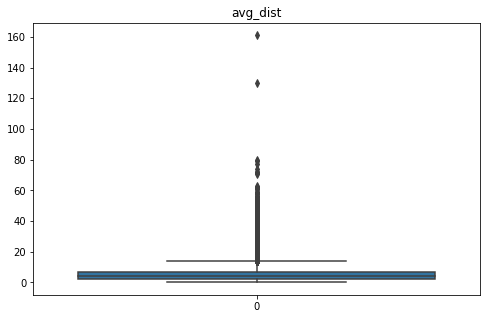

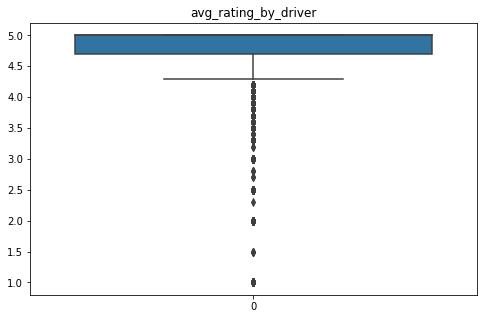

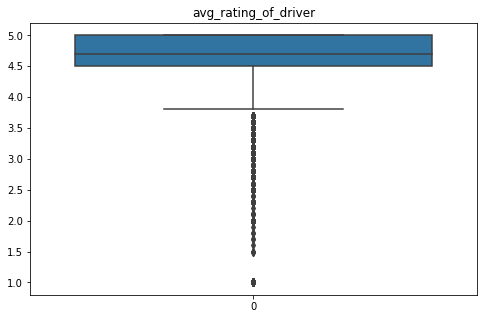

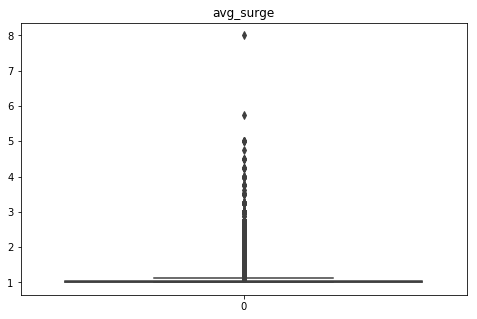

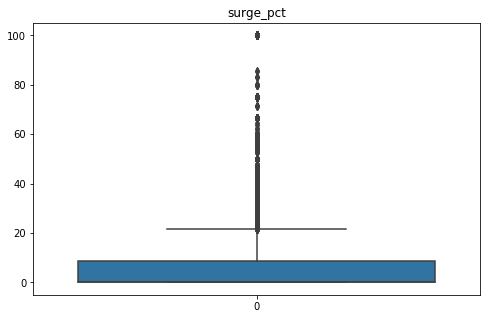

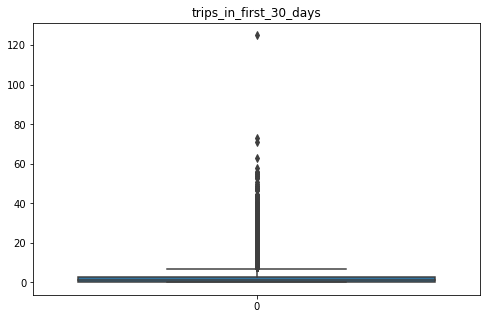

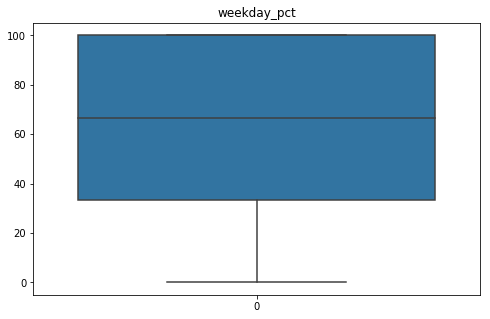

In [35]:
for i in quantitative_features:
    plt.figure(figsize=(8,5))
    sns.boxplot(data=df_ultimate[i])
    plt.title(i)
    plt.show()

In [36]:
# Filter out rows with features that have values more than 3 standard deviations from the mean
df = df_ultimate[np.abs(df_ultimate['avg_dist']-df_ultimate['avg_dist'].mean())<=(3*df_ultimate['avg_dist'].std())]
df = df_ultimate[np.abs(df_ultimate['avg_rating_by_driver']-df_ultimate['avg_rating_by_driver'].mean())<=(3*df_ultimate['avg_rating_by_driver'].std())]
df = df_ultimate[np.abs(df_ultimate['avg_rating_of_driver']-df_ultimate['avg_rating_of_driver'].mean())<=(3*df_ultimate['avg_rating_of_driver'].std())]
df = df_ultimate[np.abs(df_ultimate['avg_surge']-df_ultimate['avg_surge'].mean())<=(3*df_ultimate['avg_surge'].std())]
df = df_ultimate[np.abs(df_ultimate['surge_pct']-df_ultimate['surge_pct'].mean())<=(3*df_ultimate['surge_pct'].std())]
df = df_ultimate[np.abs(df_ultimate['trips_in_first_30_days']-df_ultimate['trips_in_first_30_days'].mean())<=(3*df_ultimate['trips_in_first_30_days'].std())]
df.reset_index(drop=True, inplace=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48918 entries, 0 to 48917
Data columns (total 12 columns):
avg_dist                  48918 non-null float64
avg_rating_by_driver      48918 non-null float64
avg_rating_of_driver      48918 non-null float64
avg_surge                 48918 non-null float64
city                      48918 non-null object
last_trip_date            48918 non-null datetime64[ns]
phone                     48918 non-null object
signup_date               48918 non-null datetime64[ns]
surge_pct                 48918 non-null float64
trips_in_first_30_days    48918 non-null int64
ultimate_black_user       48918 non-null bool
weekday_pct               48918 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


Through a boxplot we do see some numericalvariable have outliers, so we went ahead and conditions these variable to only keep values within 3 standar deviations of data. After that we went ahead and check the new amount of values.

### Checking categorical data/look for typos

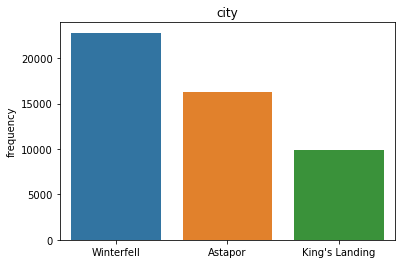

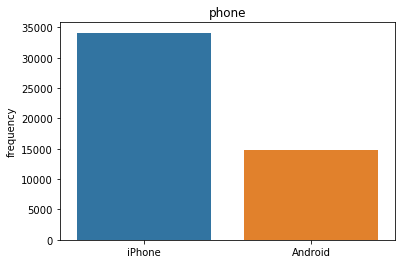

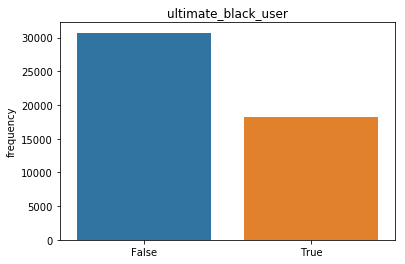

In [38]:
for feature in categorical_features:
    sns.barplot(x = list(df[np.logical_not(df[feature].isnull())][feature].value_counts().index), 
                y = df[np.logical_not(df[feature].isnull())][feature].value_counts())
    plt.title(feature)
    plt.ylabel('frequency')
    plt.show();

All categorical data looks normal, so we moved on with the analysis

### Amount of users retained

In [39]:
# last trip date in the dataset
sorted(df['last_trip_date'].unique())[-32:]

[numpy.datetime64('2014-05-31T00:00:00.000000000'),
 numpy.datetime64('2014-06-01T00:00:00.000000000'),
 numpy.datetime64('2014-06-02T00:00:00.000000000'),
 numpy.datetime64('2014-06-03T00:00:00.000000000'),
 numpy.datetime64('2014-06-04T00:00:00.000000000'),
 numpy.datetime64('2014-06-05T00:00:00.000000000'),
 numpy.datetime64('2014-06-06T00:00:00.000000000'),
 numpy.datetime64('2014-06-07T00:00:00.000000000'),
 numpy.datetime64('2014-06-08T00:00:00.000000000'),
 numpy.datetime64('2014-06-09T00:00:00.000000000'),
 numpy.datetime64('2014-06-10T00:00:00.000000000'),
 numpy.datetime64('2014-06-11T00:00:00.000000000'),
 numpy.datetime64('2014-06-12T00:00:00.000000000'),
 numpy.datetime64('2014-06-13T00:00:00.000000000'),
 numpy.datetime64('2014-06-14T00:00:00.000000000'),
 numpy.datetime64('2014-06-15T00:00:00.000000000'),
 numpy.datetime64('2014-06-16T00:00:00.000000000'),
 numpy.datetime64('2014-06-17T00:00:00.000000000'),
 numpy.datetime64('2014-06-18T00:00:00.000000000'),
 numpy.datet

In [40]:
len(df[df['last_trip_date'] >= '2014-06-01'])/len(df)*100

36.78400588740341

The last record seems to be '2014-07-01'. As explained, retained users are those who made a trip within the last 30 days.

so after checking record we see how 36.78 %  of users have taken a trip on or after June 1st, 2014(This are the consider amount retained)

### 2. 

Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

In [41]:
# Target variable, which describe weather a customer was retain or not

df['retained'] = np.nan
df.loc[df['last_trip_date'] >= '2014-06-01', 'retained'] = 1
df.loc[df['last_trip_date'] < '2014-06-01', 'retained'] = 0

df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1.0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1.0
4,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0,1.0


In [42]:
# Note needee column anymore after binary target varialbe built up
df.drop('last_trip_date', axis=1, inplace=True)

In [43]:
# Import packages for model
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [44]:
# Drop feature(not needed)
df.drop('signup_date', axis=1, inplace=True)

In [45]:
# build dummy varialbles all categorical features
df_dumv = pd.get_dummies(df, columns = ['city', 'phone', 'ultimate_black_user'])

df_dumv.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,retained,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,3.67,5.0,4.7,1.10,15.4,4,46.2,1.0,0,1,0,0,1,0,1
1,8.26,5.0,5.0,1.00,0.0,0,50.0,0.0,1,0,0,1,0,1,0
2,0.77,5.0,4.3,1.00,0.0,3,100.0,0.0,1,0,0,0,1,1,0
3,2.36,4.9,4.6,1.14,20.0,9,80.0,1.0,0,1,0,0,1,0,1
4,10.56,5.0,3.5,1.00,0.0,2,100.0,1.0,0,0,1,0,1,0,1


In [46]:
# Split data into train and test sets

train, test = train_test_split(df_dumv, test_size=.30, 
                               random_state=42, stratify=df_dumv['retained'])

train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [47]:
print(train.shape, test.shape)

(34242, 15) (14676, 15)


In [48]:
# Cross validation on the training set

from sklearn import cross_validation

target = train['retained']
train = train.drop('retained', axis=1)

# model
clf = DecisionTreeClassifier(max_depth=4, class_weight='balanced')

# cross validation on train data
cv = cross_validation.KFold(len(train), n_folds=10)

# iterating through train and test for cross validation
cv_count = 1
for traincv, testcv in cv:  
        preds = clf.fit(train.loc[list(traincv),:], 
                        target.loc[list(traincv),]).predict(train.loc[list(testcv),:])
        

        print('Round {} CV\nAccuracy: {:.2f}'
                  .format(cv_count, accuracy_score(target.loc[testcv,], preds)*100))
        cv_count += 1

C:\Users\Alfredo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Round 1 CV
Accuracy: 74.92
Round 2 CV
Accuracy: 74.95
Round 3 CV
Accuracy: 74.18
Round 4 CV
Accuracy: 74.85
Round 5 CV
Accuracy: 73.22
Round 6 CV
Accuracy: 74.15
Round 7 CV
Accuracy: 74.94
Round 8 CV
Accuracy: 74.39
Round 9 CV
Accuracy: 74.45
Round 10 CV
Accuracy: 75.00


In [49]:
# Train the model on the full training data and test on the test set
final_clf = clf.fit(train, target)

test_target = test['retained']
test = test.drop('retained', axis=1)

test_preds = final_clf.predict(test)



print('Test set accuracy: {:.2f}'
          .format(accuracy_score(test_target, test_preds)*100))

Test set accuracy: 74.61


 The model we have is about 74% accurate. The score gives us the % difference between retained and not retained users.

### 3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

One of the things that can be done is to look at the most important predictiving variables in the trees. The variables can than further be anlyze and see how they can be adjusted for optimal performance in customer retention.